# Ch 8 - Dimensionality Reduction

This the the Python code for this chapter. See the associated notes for more details.

## Principal Component Analysis

As a simple example, we can use NumPy to compute the principal components for us.

In [1]:
import numpy as np

# Creating a toy data set

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

PCA requires the data set to be centered about the origin, so we do this now manually. In SKL, the PCA class will do this for us automatically.

In [2]:
X_centered = X - X.mean(axis=0)

In [3]:
X_centered

array([[-1.03976771e+00, -7.60238460e-01, -3.32880482e-01],
       [-3.17841939e-02,  3.90260570e-01, -3.64766659e-02],
       [-9.77238797e-01, -6.73862060e-01, -3.20757101e-01],
       [-9.44190485e-01,  7.70779228e-04, -4.97304144e-02],
       [-7.87164831e-01, -5.10641487e-02,  1.19970744e-01],
       [ 1.09409378e+00,  1.15762056e-01,  2.45551498e-01],
       [-1.04665623e+00, -8.53165791e-01, -2.05241169e-01],
       [ 6.49452398e-01, -4.82750342e-01, -7.94325731e-02],
       [ 9.92128132e-01,  3.06140931e-01,  3.96278747e-01],
       [ 5.25509785e-01,  4.67955007e-01,  1.62461684e-01],
       [-1.01367188e+00, -2.00458976e-01, -1.93074561e-01],
       [ 1.10841362e+00,  7.29745189e-02, -1.82449496e-03],
       [-1.01744457e+00, -4.77653389e-01, -2.29165228e-01],
       [-9.71704237e-01, -7.08910047e-01, -2.10833327e-01],
       [ 1.07688965e+00, -3.86770525e-02,  2.63501050e-02],
       [-3.70113351e-01,  2.44018985e-01, -7.21578839e-03],
       [ 6.66958762e-01, -4.82702763e-01

In [4]:
# Training instances for first feature

X_centered[:,0]

array([-1.03976771, -0.03178419, -0.9772388 , -0.94419049, -0.78716483,
        1.09409378, -1.04665623,  0.6494524 ,  0.99212813,  0.52550978,
       -1.01367188,  1.10841362, -1.01744457, -0.97170424,  1.07688965,
       -0.37011335,  0.66695876,  0.65896157,  0.85333565, -1.08496872,
        0.49929899, -0.96826148, -0.99569625, -1.12967405,  1.15080196,
        0.88930378, -0.31095574,  1.07840518, -0.95988339,  0.63765426,
        0.07489424, -1.10509902,  0.00597516,  0.95439882,  0.94850707,
       -0.09331005, -0.00716575, -0.42951228,  0.61756082, -0.664188  ,
        0.70857275, -0.47406479, -1.0086781 ,  1.09532478,  0.76034321,
        0.14229753, -0.69778492,  1.09022918, -0.1378834 , -0.4787847 ,
       -1.18197222,  0.81087359, -0.49347043,  1.12439206,  0.21633176,
        1.08160954, -1.03558753,  0.50112667, -1.11982458,  0.56285699])

In [5]:
# Verifying that each feature column is indeed zero-centered (ie. mean is 0)

for i in range(3):
    print(np.mean(X_centered[:,i]))

-5.551115123125783e-18
-4.625929269271485e-18
-1.850371707708594e-17


Now we use NumPy to compute the SVD for us:

In [6]:
U, sigma, Vt = np.linalg.svd(X_centered)

Finally, we can extract the principal components from the V matrix. Note that the output of an SVD will yield V transpose, so you must transpose it once more.

In [7]:
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]
c3 = Vt.T[:,2]

In [8]:
print("First PC: ", c1)
print("Second PC: ", c2)
print("Third PC: ", c3)

First PC:  [0.93636116 0.29854881 0.18465208]
Second PC:  [-0.34027485  0.90119108  0.2684542 ]
Third PC:  [-0.08626012 -0.31420255  0.94542898]


**Projecting Onto A Hyperplane**

Once we have decided as to which principal components we wish to use, we can easily project our training set onto the defined hyperplane by computing the matrix product:

$$ \mathbf{X}_{d-proj} =  \mathbf{XW}_d$$

where $\mathbf{X}$ is the matrix of training instances, and $\mathbf{W}_d$ is the matrix whose columns are the first $d$ principal components defining the hyperplane.

In [9]:
d = 2 # Dimension of hyperplane

W_2 = Vt.T[:, :d]
X_2d_manual = X_centered.dot(W_2)

In [10]:
X_2d_manual

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

**Using SKL to Compute Principal Components**

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X) # NOTE: We don't have to center the data ourselves!

We can compare our manually computed principal components with these SKL ones. We see they are exactly the same:

In [12]:
X_2d_manual[:10]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264]])

In [13]:
X_2d[:10]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049],
       [-1.10436914,  0.20204953],
       [ 1.27265808,  0.46781247],
       [-0.44933007,  0.67736663],
       [-1.09356195, -0.04467792],
       [-0.66177325, -0.28651264]])

The principal components are shown below, as well as those we computed manually.

**Note:** We see that the manually computed principal components point in the opposite direction as the ones computed by SKL, but since the values are the same, they define the same hyperplane.

In [14]:
pca.components_.T

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

In [15]:
Vt.T[:,0]

array([0.93636116, 0.29854881, 0.18465208])

In [16]:
Vt.T[:,1]

array([-0.34027485,  0.90119108,  0.2684542 ])

**Explained Variance Ratio**

In [17]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

This means that ~84.2% of the variance lies on the first principal component, and ~14.6% lies on the second.

In [18]:
1-pca.explained_variance_ratio_.sum()

0.011195535570688975

Hence, there is ~1.1196% of the variance from the original data set that is unaccounted for after projection.

**Selecting the Hyperplane Dimension**

In [19]:
desired_variance = 0.95

pca = PCA(n_components=desired_variance)
X_reduced = pca.fit_transform(X)

In [20]:
pca.components_.T

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

As expected, we get the same hyperplane dimension of 2.

**Incremental PCA**

In [21]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [22]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

mnist["data"].shape

(70000, 784)

With the MNIST data loaded and split, we now perform PCA incrementally by splitting the entire training data set into 100 mini-batches.

**Note:** We have to use the 'partial_fit()' method when dealing with mini-batches! And then use the 'transform()' method to output the final reduced data set.

In [23]:
from sklearn.decomposition import IncrementalPCA

num_batches = 100
pca_incremental = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, num_batches):
    print(".", end="")     # Each . represents a completed batch
    pca_incremental.partial_fit(X_batch)

X_reduced = pca_incremental.transform(X_train)

....................................................................................................

In [24]:
X_reduced.shape

(52500, 154)

Indeed, we were able to reduce the dimension from 784 to only 154!

**Using NumPy's 'memmap' Class for Incremental PCA**

NumPy's 'memmap' class allows us to manipulate a large array stored on disk as a binary file. We first create this binary file and store our MNIST data within it:

In [25]:
binary_filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename = binary_filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

To ensure the binary file is indeed saved to disk, we must actually delete the memmap() object. Doing this triggers the objects 'Python finalizer' (???):

In [26]:
del X_mm

Now, we are ready to perform our IPCA by reading data in mini-batches from the binary file:

In [27]:
X_mm = np.memmap(filename = binary_filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // num_batches

inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm) # Don't need to use 'partial_fit()'!!

IncrementalPCA(batch_size=525, n_components=154)

## Kernal PCA

In [28]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [29]:
from sklearn.decomposition import KernelPCA

pca_rbf_kernel = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)
X_reduced = pca_rbf_kernel.fit_transform(X)

**Selecting a Kernel & Tuning Hyperparameters**

Since kPCA is an *unsupervised* ML algorithm, we cannot directly do hyperparameter tuning since there is no performance measure we can use for assessment.

But here we present a way to use GridSearchCV alongside kPCA and ultimately create a logistic regression ML model for the purposes of classification (using the Swiss roll data set)

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [31]:
classifier_pipeline = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

In [32]:
# Specifing the hyperparameters we wish to investigate
param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

In [33]:
y = t > 6.9 # Why??????

grid_search = GridSearchCV(classifier_pipeline, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

We can now print the optimal parameters:

In [34]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


**Using Pre-Image Reconstruction to Assess kPCA**

As you have read in the notes, we cannot find reconstructions from the reduced space (under linear PCA) as the feature space is infinite dimensional. Thus, we must follow the alternative procedure as outlined in the notes, and we do that now.

We start by instantiating an instance of the KernelPCA class. Note we have to specify the 'fit_inverse_transform' hyperparameter as "True":

In [35]:
pca_rbf = KernelPCA(n_components=2,
                    kernel = "rbf",
                    gamma = 0.0433, # We are using the gamma found above
                    fit_inverse_transform = True) # Must set to 'True'!!!

Now, we can apply this kPCA to our data set to get the reduced data set:

In [36]:
X_reduced = pca_rbf.fit_transform(X)

And we can then compute the pre-images:

In [37]:
X_preimage = pca_rbf.inverse_transform(X_reduced) # Method only available if you instantiate the class with 'fit_inverse_transform' as True

Finally, we can compute the reconstruction pre-image error:

In [38]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

9.045772513076282e-27

With this now possible, we can use GridSearchCV and cross-validation to find the optimal kernel and hyperparameter values that would minimize this error!

## Locally Linear Embeddings (LLE)

In [39]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

We can visualize the lower-dimensional data below:

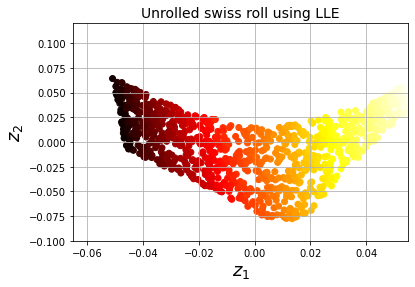

In [40]:
import matplotlib.pyplot as plt

plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

Indeed, we see that within the same clusters, the data points are locally well-preserved (ie. their local distances are preserved), but for data points that are not close together, their distances are NOT preserved!